<a href="https://colab.research.google.com/github/Mahdi-Saadati/Artificial-Intelligence/blob/main/7.%20Yolo%20Object%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

تفاوت ۳ واژه Classification و Detection و Segmentation در پردازش تصویر:

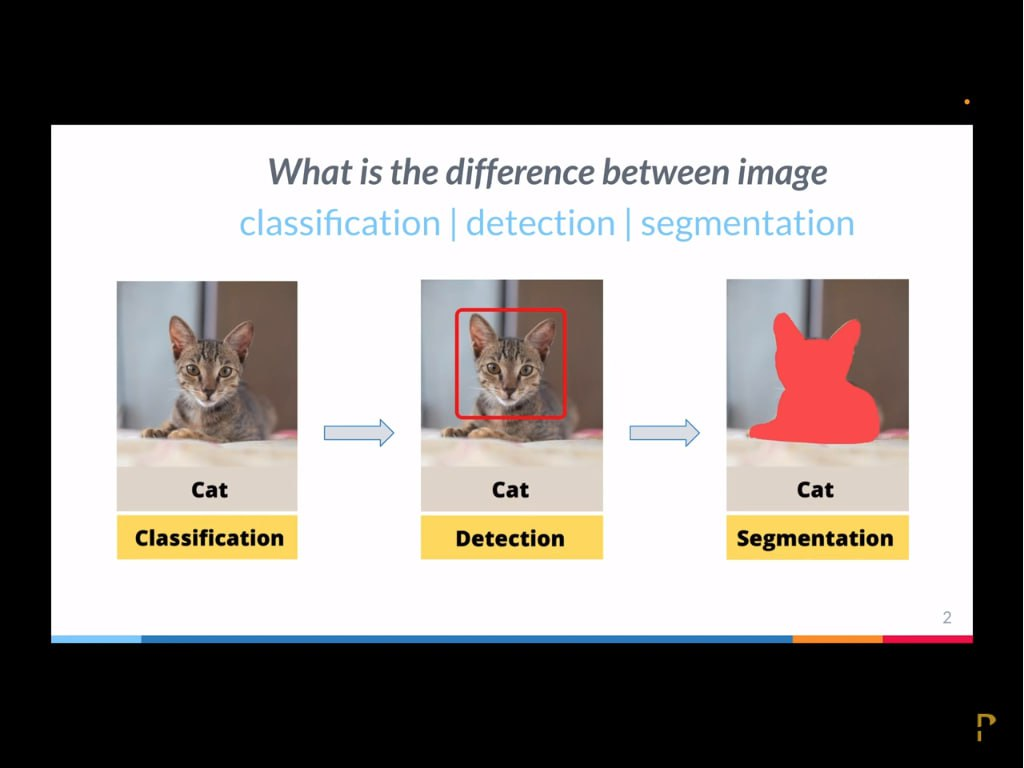

فرض کنید یک تصویر پزشکی دارین. اگه با استفاده از الگوریتم های هوش مصنوعی فقط بیاین و تشخیص بدین که اون تصویر مربوط به بیماری خاصی هست یا خیر، بهش Classification یا دسته بندی و طبقه بندی میگن. در مثال بالا تشخیص دادیم که تصویر مربوط به یک گربه هست.
اگه در تصویر دنبال مشخص کردن ناحیه تقریبی یک تومور یا ناحیه خاص باشین بهش Detection یا تشخیص میگن. در مثال بالا ناحیه تقریبی صورت گربه رو مشخص کردیم.
و اگه به دنبال پیدا کردن ناحیه دقیق و یا میزان مساحت اون تومور یا ناحیه باشین بهش Segmentation یا بخش بندی میگن. در مثال بالا ناحیه دقیق و مساحت گربه رو مشخص کردیم.


In [ ]:
import cv2
from ultralytics import YOLO

# بارگذاری مدل YOLOv8 نسخه segmentation
# (مدل آماده روی دیتاست COCO آموزش دیده است)
model = YOLO("yolov8n-seg.pt")  # مدل سبک (n=nano)، می‌توان از s/m/l هم استفاده کرد

# باز کردن وبکم
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)  # برعکس کردن تصویر مثل آینه (راحت‌تر برای کاربر)
    if not ret:
        break

    # اجرای مدل YOLO روی هر فریم
    results = model(frame, stream=True)  # stream=True یعنی خروجی به صورت پیوسته برای ویدئو

    # پیمایش بین خروجی‌ها (اشیا پیدا شده)
    for r in results:
        # رسم همه ماسک‌ها، جعبه‌ها و لیبل‌ها روی تصویر
        annotated_frame = r.plot()

    # نمایش تصویر خروجی
    cv2.imshow("YOLOv8 Segmentation - Webcam", annotated_frame)

    # اگر کلید q فشرده شود، خروج از حلقه
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()
